<a href="https://colab.research.google.com/github/mobarakol/DL_Robotic_AI/blob/main/ResNet_Weights_FeatureMaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 128MB/s]


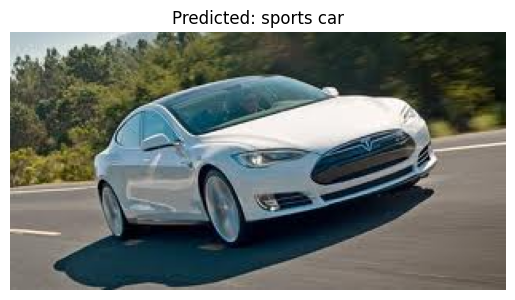

In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import requests
from PIL import Image
import matplotlib.pyplot as plt
import json

# ✅ Define the image URL
image_url = "https://www.autosnout.com/editionimages/1022.jpg"

# ✅ Load and preprocess the image
response = requests.get(image_url, stream=True)
image = Image.open(response.raw).convert("RGB")

# ✅ Define ImageNet preprocessing transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),   # Resize to ResNet input size
    transforms.ToTensor(),           # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet normalization
])

# ✅ Apply transformations
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# ✅ Load pre-trained ResNet model (ResNet-50)
model = models.resnet50(pretrained=True)
model.eval()  # Set model to evaluation mode

# ✅ Perform inference
with torch.no_grad():
    outputs = model(input_tensor)

# ✅ Load ImageNet class labels
imagenet_labels = requests.get("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt").text.splitlines()

# ✅ Get the top predicted class
_, predicted_idx = outputs[0].max(0)
predicted_label = imagenet_labels[predicted_idx.item()]

# ✅ Display the image with prediction
plt.imshow(image)
plt.axis("off")
plt.title(f"Predicted: {predicted_label}")
plt.show()


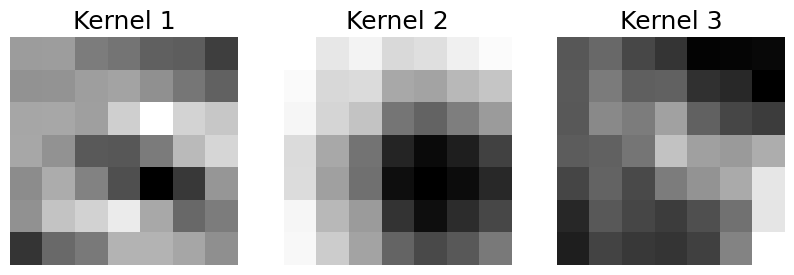

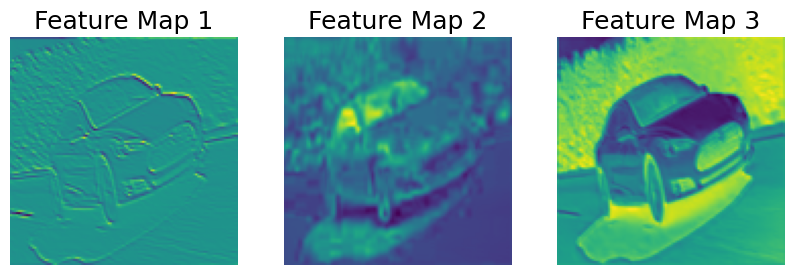

In [7]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import requests
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# ✅ Define the image URL
image_url = "https://www.autosnout.com/editionimages/1022.jpg"

# ✅ Load and preprocess the image
response = requests.get(image_url, stream=True)
image = Image.open(response.raw).convert("RGB")

# ✅ Define ImageNet preprocessing transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# ✅ Apply transformations
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# ✅ Load pre-trained ResNet-50
model = models.resnet50(pretrained=True)
model.eval()

# ✅ Extract the first convolutional layer
first_conv_layer = model.conv1  # First conv layer of ResNet-50
kernels = first_conv_layer.weight.data.cpu().numpy()  # Convert to numpy

# ✅ Display the first 3 convolutional kernels
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i in range(3):
    kernel = kernels[i, 0]  # Take the first channel of each kernel
    axes[i].imshow(kernel, cmap="gray")
    axes[i].axis("off")
    axes[i].set_title(f"Kernel {i+1}", fontsize=18)
# plt.suptitle("First 3 Kernels in the First Layer")
plt.show()

# ✅ Hook to extract feature maps from the first conv layer
activation = {}

def hook_fn(module, input, output):
    activation["conv1"] = output

hook = model.conv1.register_forward_hook(hook_fn)

# ✅ Perform inference to get feature maps
with torch.no_grad():
    model(input_tensor)

# ✅ Retrieve feature maps
feature_maps = activation["conv1"][0].cpu().numpy()  # Remove batch dimension

# ✅ Display the first 3 feature maps
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i in range(3):
    axes[i].imshow(feature_maps[i], cmap="viridis")
    axes[i].axis("off")
    axes[i].set_title(f"Feature Map {i+1}", fontsize=18)
# plt.suptitle("First 3 Feature Maps from the First Layer")
plt.show()


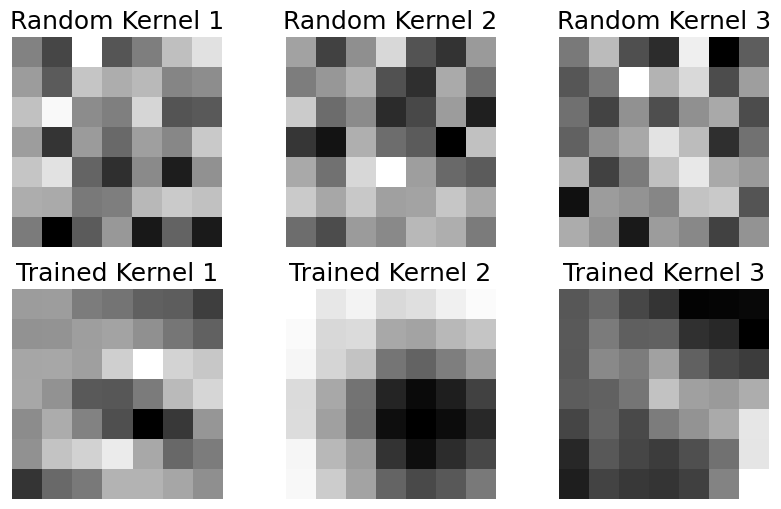

In [8]:
import torch
import torchvision.models as models
import numpy as np
import matplotlib.pyplot as plt

# ✅ Load pre-trained ResNet-50
model = models.resnet50(pretrained=True)
model.eval()

# ✅ Extract the first convolutional layer (Trained Kernels)
first_conv_layer = model.conv1
trained_kernels = first_conv_layer.weight.data.cpu().numpy()  # Convert to numpy

# ✅ Generate randomly initialized kernels of the same size
random_kernels = np.random.randn(*trained_kernels.shape) * 0.1  # Random init with similar scale

# ✅ Display the first 3 trained kernels
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
for i in range(3):
    kernel_trained = trained_kernels[i, 0]  # First channel of trained kernel
    kernel_random = random_kernels[i, 0]  # First channel of random kernel

    axes[1, i].imshow(kernel_trained, cmap="gray")
    axes[1, i].axis("off")
    axes[1, i].set_title(f"Trained Kernel {i+1}", fontsize=18)  # Increased font size

    axes[0, i].imshow(kernel_random, cmap="gray")
    axes[0, i].axis("off")
    axes[0, i].set_title(f"Random Kernel {i+1}", fontsize=18)  # Increased font size

# plt.suptitle("Comparison: Trained vs. Randomly Initialized Kernels", fontsize=16)  # Larger title
plt.show()
